A neural network that predicts whether a student will complete their education based on specific factors. Dataset taken from - https://www.kaggle.com/datasets/waleedejaz/predict-students-dropout-and-academic-success

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from keras.models import Sequential, clone_model
from keras.layers import Dense, Dropout
import seaborn as sns

In [190]:
data = pd.read_csv("/Users/maxkucher/data_handling/ML_projects/data.csv", sep=";")
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [191]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [192]:
data = data.drop("Course", axis="columns")
data

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,1,1,122.0,1,19,12,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,1,1,160.0,1,1,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,1,1,122.0,1,37,37,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,1,1,122.0,1,38,37,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,0,1,100.0,1,37,38,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,125.0,1,1,1,5,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,1,1,120.0,105,1,1,9,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,1,1,154.0,1,37,37,9,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,1,1,180.0,1,37,37,7,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [193]:
data.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [194]:
maj = data[data["Target"] == "Graduate"]
mid = data[data["Target"] == "Dropout"]
min = data[data["Target"] == "Enrolled"]

In [195]:
mid = mid.sample(len(maj), replace=True, random_state=42)
min = min.sample(len(maj), replace=True, random_state=42)

In [196]:
print(len(min) == len(mid) == len(maj))
print(len(min))

True
2209


In [197]:
data = pd.concat([min, mid, maj], ignore_index=True)
data

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,1,1,132.0,1,1,1,3,...,0,5,9,3,12.666667,0,9.4,-0.8,-3.12,Enrolled
1,1,1,1,1,1,130.0,1,1,38,5,...,0,0,0,0,0.000000,0,9.4,-0.8,-3.12,Enrolled
2,2,1,1,0,1,121.0,1,37,37,9,...,2,7,12,7,13.857143,0,7.6,2.6,0.32,Enrolled
3,1,1,1,1,1,133.0,1,3,19,2,...,0,7,11,5,11.700000,0,16.2,0.3,-0.92,Enrolled
4,1,17,4,1,1,125.0,1,1,3,3,...,0,6,8,4,11.200000,0,8.9,1.4,3.51,Enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,1,1,1,1,1,132.0,1,1,1,9,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,Graduate
6623,1,44,1,1,39,120.0,1,3,38,3,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,Graduate
6624,1,1,6,1,1,125.0,1,1,1,5,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
6625,1,1,1,1,1,180.0,1,37,37,7,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [198]:
data.replace({"Target": {"Enrolled": 0, "Dropout": 1, "Graduate": 2}}, inplace=True)
data


/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_40525/4249123904.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Target": {"Enrolled": 0, "Dropout": 1, "Graduate": 2}}, inplace=True)


,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,1,1,132.0,1,1,1,3,...,0,5,9,3,12.666667,0,9.4,-0.8,-3.12,0
1,1,1,1,1,1,130.0,1,1,38,5,...,0,0,0,0,0.000000,0,9.4,-0.8,-3.12,0
2,2,1,1,0,1,121.0,1,37,37,9,...,2,7,12,7,13.857143,0,7.6,2.6,0.32,0
3,1,1,1,1,1,133.0,1,3,19,2,...,0,7,11,5,11.700000,0,16.2,0.3,-0.92,0
4,1,17,4,1,1,125.0,1,1,3,3,...,0,6,8,4,11.200000,0,8.9,1.4,3.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,1,1,1,1,1,132.0,1,1,1,9,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,2
6623,1,44,1,1,39,120.0,1,3,38,3,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,2
6624,1,1,6,1,1,125.0,1,1,1,5,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
6625,1,1,1,1,1,180.0,1,37,37,7,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


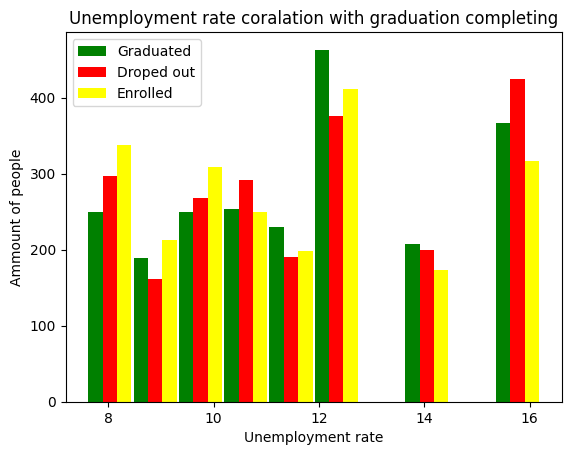

In [227]:
grad = data[data["Target"] == 2]["Unemployment rate"]
drop = data[data["Target"] == 1]["Unemployment rate"]
enr = data[data["Target"] == 0]["Unemployment rate"]

plt.xlabel("Unemployment rate")
plt.ylabel("Ammount of people")
plt.title("Unemployment rate coralation with graduation completing")

plt.hist([grad, drop, enr], rwidth=0.95, color=["green", "red", "yellow"], label=["Graduated", "Droped out", "Enrolled"])
plt.legend()

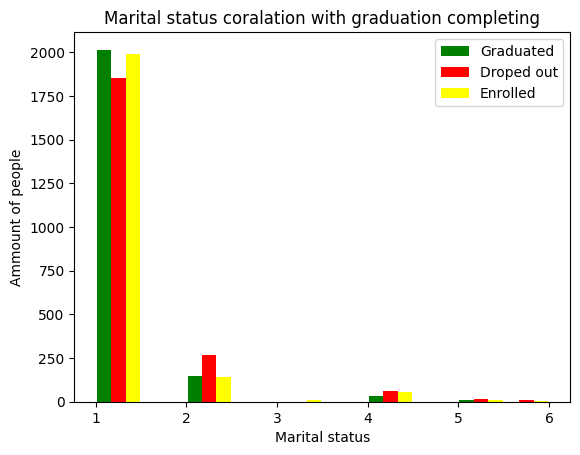

In [230]:
grad = data[data["Target"] == 2]["Marital status"]
drop = data[data["Target"] == 1]["Marital status"]
enr = data[data["Target"] == 0]["Marital status"]

plt.xlabel("Marital status")
plt.ylabel("Ammount of people")
plt.title("Marital status coralation with graduation completing")

plt.hist([grad, drop, enr], rwidth=0.95, color=["green", "red", "yellow"], label=["Graduated", "Droped out", "Enrolled"])
plt.legend()

In [199]:
scaller = MinMaxScaler()

x = data.drop("Target", axis="columns")
y = data["Target"]


colunmns_to_scale = []
dummies_columns = []

for column in x.columns:
    if len(x[column].value_counts()) >= 9:
        colunmns_to_scale.append(column)
    elif 2 < len(x[column].value_counts()) <= 8:
        dummies_columns.append(column)


for col in colunmns_to_scale:
    x[col] = scaller.fit_transform(x[[col]])

x

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,0.000000,1,1,0.000000,0.389474,0.000000,0.000000,0.000000,0.015464,...,0.25,0.000000,0.217391,0.272727,0.15,0.682051,0.000000,0.209302,0.000000,0.124174
1,1,0.000000,1,1,0.000000,0.368421,0.000000,0.000000,0.860465,0.025773,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.209302,0.000000,0.124174
2,2,0.000000,1,0,0.000000,0.273684,0.000000,0.857143,0.837209,0.046392,...,0.00,0.105263,0.304348,0.363636,0.35,0.746154,0.000000,0.000000,0.755556,0.578600
3,1,0.000000,1,1,0.000000,0.400000,0.000000,0.047619,0.418605,0.010309,...,0.00,0.000000,0.304348,0.333333,0.25,0.630000,0.000000,1.000000,0.244444,0.414795
4,1,0.285714,4,1,0.000000,0.315789,0.000000,0.000000,0.046512,0.015464,...,0.00,0.000000,0.260870,0.242424,0.20,0.603077,0.000000,0.151163,0.488889,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,1,0.000000,1,1,0.000000,0.389474,0.000000,0.000000,0.000000,0.046392,...,0.00,0.000000,0.260870,0.181818,0.30,0.726923,0.000000,1.000000,0.244444,0.414795
6623,1,0.767857,1,1,0.904762,0.263158,0.000000,0.047619,0.860465,0.015464,...,0.00,0.263158,0.391304,0.303030,0.35,0.707692,0.083333,1.000000,0.244444,0.414795
6624,1,0.000000,6,1,0.000000,0.315789,0.000000,0.000000,0.000000,0.025773,...,0.00,0.000000,0.260870,0.242424,0.25,0.682051,0.000000,0.918605,0.800000,0.000000
6625,1,0.000000,1,1,0.000000,0.894737,0.000000,0.857143,0.837209,0.036082,...,0.00,0.000000,0.217391,0.181818,0.25,0.646154,0.000000,0.209302,0.000000,0.124174


In [200]:
y.value_counts()

Target
0    2209
1    2209
2    2209
Name: count, dtype: int64

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [202]:
x_train.shape

(5301, 35)

In [203]:
model = Sequential([
    Dense(29, input_shape=(35, ), activation="relu"),
    Dense(32, activation="selu"),
    Dense(36, activation="relu"),
    Dense(31, activation="selu"),
    Dense(28, activation="relu"),
    Dense(23, activation="selu"),
    Dense(19, activation="relu"),
    Dense(15, activation="relu"),
    Dense(11, activation="relu"),
    Dense(9, activation="relu"),
    Dense(6, activation="relu"),
    Dense(4, activation="relu"),
    Dense(3, activation="softmax")


])


def compiler(model, optimizer, loss_func, metrics):
    model.compile(
        optimizer=optimizer,
        loss=loss_func,
        metrics=metrics
    )

    return model


model = compiler(model, "SGD", "sparse_categorical_crossentropy", ["accuracy"])

In [204]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 29)                1044      
                                                                 
 dense_109 (Dense)           (None, 32)                960       
                                                                 
 dense_110 (Dense)           (None, 36)                1188      
                                                                 
 dense_111 (Dense)           (None, 31)                1147      
                                                                 
 dense_112 (Dense)           (None, 28)                896       
                                                                 
 dense_113 (Dense)           (None, 23)                667       
                                                                 
 dense_114 (Dense)           (None, 19)              

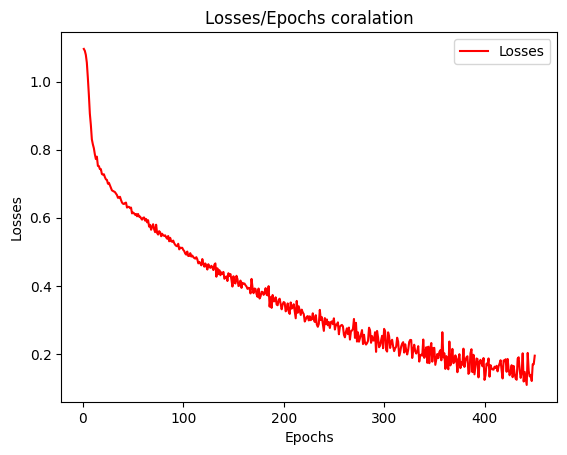

In [205]:
def plot_loss_graph(basic_model, x_train, y_train, epochs, verbose):
    global model_graph
    model_graph = clone_model(basic_model)
    compiler(model_graph, "SGD", "sparse_categorical_crossentropy", ["accuracy"])


    history = model_graph.fit(x_train, y_train, epochs=epochs, verbose=verbose)

    losses = history.history["loss"]
    epochs = range(1, len(losses)+1)

    plt.plot(epochs, losses, "r", label="Losses")
    plt.title("Losses/Epochs coralation")
    plt.xlabel("Epochs")
    plt.ylabel("Losses")
    plt.legend()
    plt.show()

plot_loss_graph(model, x_train, y_train, 450, 0)



In [206]:
model.fit(x_train, y_train, epochs=450)

Epoch 1/450
166/166 [==============================] - 0s 635us/step - loss: 1.0985 - accuracy: 0.3494
Epoch 2/450
166/166 [==============================] - 0s 557us/step - loss: 1.0971 - accuracy: 0.3897
Epoch 3/450
166/166 [==============================] - 0s 543us/step - loss: 1.0950 - accuracy: 0.4410
Epoch 4/450
166/166 [==============================] - 0s 543us/step - loss: 1.0918 - accuracy: 0.4959
Epoch 5/450
166/166 [==============================] - 0s 548us/step - loss: 1.0858 - accuracy: 0.4931
Epoch 6/450
166/166 [==============================] - 0s 551us/step - loss: 1.0720 - accuracy: 0.5080
Epoch 7/450
166/166 [==============================] - 0s 552us/step - loss: 1.0380 - accuracy: 0.5174
Epoch 8/450
166/166 [==============================] - 0s 536us/step - loss: 0.9790 - accuracy: 0.5365
Epoch 9/450
166/166 [==============================] - 0s 538us/step - loss: 0.9261 - accuracy: 0.5540
Epoch 10/450
166/166 [==============================] - 0s 537us/step - l

In [207]:
model.evaluate(x_test, y_test)

42/42 [==============================] - 0s 554us/step - loss: 0.6055 - accuracy: 0.8484


[0.6054785251617432, 0.848416268825531]

In [208]:
model_graph.evaluate(x_test, y_test)

42/42 [==============================] - 0s 571us/step - loss: 0.5783 - accuracy: 0.8507


[0.5782697796821594, 0.8506787419319153]

In [211]:
preds = model.predict(x_test)
preds_arr = []
for pred in preds:
    preds_arr.append(np.argmax(pred))

preds_arr = np.array(preds_arr)
preds_arr


42/42 [==============================] - 0s 567us/step


array([2, 0, 0, ..., 2, 1, 2])

In [212]:
preds_frame = pd.DataFrame({"Actuals: ": y_test.squeeze(), "Predictions: ": preds_arr.squeeze()})
preds_frame

,Actuals:,Predictions:
5121,2,2
2119,0,0
309,0,0
5929,2,1
4354,1,1
...,...,...
1265,0,0
4771,2,2
5588,2,2
3345,1,1


In [215]:
cm = confusion_matrix(y_test, preds_arr)
cm

array([[405,  15,  24],
       [ 32, 371,  35],
       [ 72,  23, 349]])

Text(50.722222222222214, 0.5, 'Actuals')

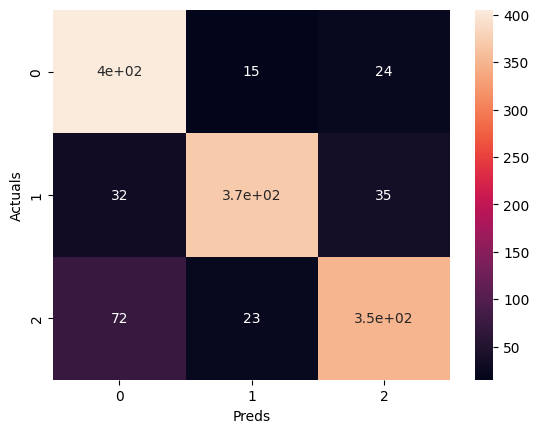

In [218]:
sns.heatmap(cm, annot=True)
plt.xlabel("Preds")
plt.ylabel("Actuals")